In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from collections import Counter
sns.set()
%matplotlib inline

In [3]:
!ls

2013_movies.csv            heavy_metal_parsed.pkl.zip
Challenge 7.ipynb          house-votes-84.data
Challenge 8.ipynb          ships.dta
data.txt                   titanic_train.csv
haberman.data              toni_is_awesome.txt


In [4]:
df = pd.read_csv('house-votes-84.data', names=list(range(16))+['party'])

In [5]:
df.replace(to_replace={'y': 1, 'n' : 0, '?': np.nan, 'republican.': 'republican', 'democrat.': 'democrat'}, inplace=True)
df.replace(to_replace={'republican' : 0, 'democrat' : 1}, inplace=True)
for i in range(16):
    df[i].fillna(df[i].mean(), inplace=True)

In [6]:
X = df[list(range(16))]
y = df.party
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [7]:
models = {}
models['logit'] = LogisticRegression()
for k in range(1, 21):
    models[str(k)+' nearest nbrs'] = KNeighborsClassifier(n_neighbors = k)
models['GNB'] = GaussianNB()
models['SVC'] = SVC()
models['DTree'] = DecisionTreeClassifier()
models['RFor'] = RandomForestClassifier()

In [8]:
for name, model in models.items():
    print('Model: %s' % name)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('\tAccuracy:\t %s' % accuracy_score(y_test, pred))
    print('\tPrecision:\t %s' % precision_score(y_test, pred))
    print('\tRecall:\t\t %s' % recall_score(y_test, pred))
    print('\tf1score:\t %s' % f1_score(y_test, pred))

Model: logit
	Accuracy:	 0.93893129771
	Precision:	 0.925925925926
	Recall:		 0.974025974026
	f1score:	 0.949367088608
Model: 1 nearest nbrs
	Accuracy:	 0.900763358779
	Precision:	 0.910256410256
	Recall:		 0.922077922078
	f1score:	 0.916129032258
Model: 2 nearest nbrs
	Accuracy:	 0.916030534351
	Precision:	 0.934210526316
	Recall:		 0.922077922078
	f1score:	 0.928104575163
Model: 3 nearest nbrs
	Accuracy:	 0.900763358779
	Precision:	 0.910256410256
	Recall:		 0.922077922078
	f1score:	 0.916129032258
Model: 4 nearest nbrs
	Accuracy:	 0.931297709924
	Precision:	 0.959459459459
	Recall:		 0.922077922078
	f1score:	 0.940397350993
Model: 5 nearest nbrs
	Accuracy:	 0.916030534351
	Precision:	 0.923076923077
	Recall:		 0.935064935065
	f1score:	 0.929032258065
Model: 6 nearest nbrs
	Accuracy:	 0.916030534351
	Precision:	 0.934210526316
	Recall:		 0.922077922078
	f1score:	 0.928104575163
Model: 7 nearest nbrs
	Accuracy:	 0.916030534351
	Precision:	 0.934210526316
	Recall:		 0.922077922078
	f1s

In [14]:
def plot_roc(model_name):
    l = models[model_name]
    l.fit(X_train, y_train)
    fpr, tpr, thresh = roc_curve(y_test, l.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)  


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s ROC for Predicting Democrat' % model_name.title())
    plt.legend(loc="lower right")
    plt.show()

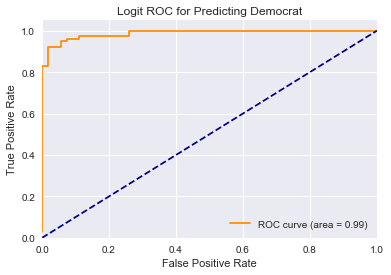

In [15]:
plot_roc('logit')

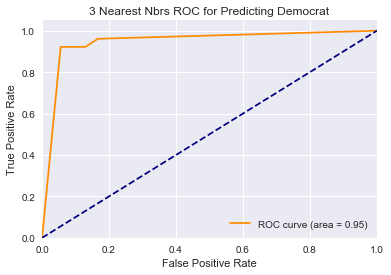

In [16]:
plot_roc('3 nearest nbrs')

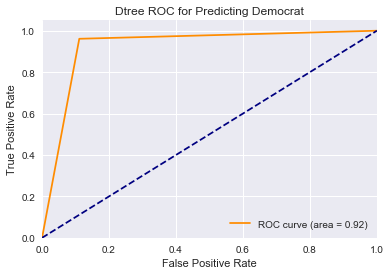

In [17]:
plot_roc('DTree')

In [18]:
for name, model in models.items():
    print('Model: %s' % name)
    print('\tAccuracy x-val:\t %s' % np.mean(cross_val_score(model, X, y, scoring='accuracy')))
    print('\tPrecision x-val: %s' % np.mean(cross_val_score(model, X, y, scoring='precision')))
    print('\tRecall x-val:\t %s' % np.mean(cross_val_score(model, X, y, scoring='recall')))
    print('\tf1 score x-val:\t %s' % np.mean(cross_val_score(model, X, y, scoring='f1')))

Model: logit
	Accuracy x-val:	 0.96091954023
	Precision x-val: 0.970163331033
	Recall x-val:	 0.966292134831
	f1 score x-val:	 0.967864264228
Model: 1 nearest nbrs
	Accuracy x-val:	 0.935632183908
	Precision x-val: 0.968205320691
	Recall x-val:	 0.925093632959
	f1 score x-val:	 0.945811143778
Model: 2 nearest nbrs
	Accuracy x-val:	 0.903448275862
	Precision x-val: 0.974648933114
	Recall x-val:	 0.865168539326
	f1 score x-val:	 0.916336600935
Model: 3 nearest nbrs
	Accuracy x-val:	 0.931034482759
	Precision x-val: 0.961544591063
	Recall x-val:	 0.925093632959
	f1 score x-val:	 0.942665773493
Model: 4 nearest nbrs
	Accuracy x-val:	 0.919540229885
	Precision x-val: 0.971666394251
	Recall x-val:	 0.895131086142
	f1 score x-val:	 0.931622638973
Model: 5 nearest nbrs
	Accuracy x-val:	 0.933333333333
	Precision x-val: 0.961371867646
	Recall x-val:	 0.928838951311
	f1 score x-val:	 0.944804199632
Model: 6 nearest nbrs
	Accuracy x-val:	 0.926436781609
	Precision x-val: 0.97193302828
	Recall x-v

In [19]:
movies = pd.read_csv('2013_movies.csv', parse_dates=True, infer_datetime_format=True)
movies.dropna(inplace=True)
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movies.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [20]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
pred = logit.predict(X_test)

#No PGs are predicted, so we cannot predict precision and recall for this class
Counter(pred)

Counter({'PG-13': 22, 'R': 5})

In [21]:
print('For Logit')
prec = list(zip(logit.classes_, precision_score(y_test, pred, average=None)))
reca = list(zip(logit.classes_, recall_score(y_test, pred, average=None)))
pd.DataFrame(prec, columns=['class', 'precision']).merge(pd.DataFrame(reca, columns=['class', 'accuracy'])).set_index('class')

For Logit


/Users/home/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,accuracy
class,,
PG,0.000000,0.000000
PG-13,0.409091,0.818182
R,0.600000,0.272727


In [22]:
five_nearest_nhbrs = KNeighborsClassifier(n_neighbors=5)
five_nearest_nhbrs.fit(X_train, y_train)
pred = five_nearest_nhbrs.predict(X_test)

Counter(pred)

Counter({'PG': 1, 'PG-13': 14, 'R': 12})

In [23]:
print("For KNN, k=5")
prec = list(zip(five_nearest_nhbrs.classes_, precision_score(y_test, pred, average=None)))
reca = list(zip(five_nearest_nhbrs.classes_, recall_score(y_test, pred, average=None)))
pd.DataFrame(prec, columns=['class', 'precision']).merge(pd.DataFrame(reca, columns=['class', 'accuracy'])).set_index('class')

For KNN, k=5


,precision,accuracy
class,,
PG,0.000000,0.000000
PG-13,0.500000,0.636364
R,0.666667,0.727273


In [24]:
#precision and accuracy are the same for guessing the mode
len(y_test[y_test == 'PG-13'])/len(y_test)

0.4074074074074074

In [25]:
sur = pd.read_csv('haberman.data', names=['age', 'year', 'nodes', 'survived'])
sur.survived.replace(2, 0, inplace=True)
X = sur[['age', 'year', 'nodes']]
y = sur.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [26]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

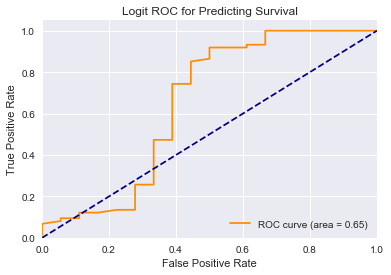

In [29]:
fpr, tpr, thresh = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)  


plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logit ROC for Predicting Survival')
plt.legend(loc="lower right")
plt.show()